## Installing the praw

In [59]:
!pip install praw

## Authentication

In [60]:
import praw

user_agent = "Reddit_Scrapper 1.0 by //u//FeatureChoice5036"
reddit = praw.Reddit(
    client_id="1CZ1iBdlzUPvtpHUMEqxKQ",
    client_secret="cM5KLW2vf4f5myJQ2UjtCkRwb4bxeg",
    user_agent=user_agent
)

In [61]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Trending Topics - Subreddit - Bitcoin

In [62]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
1bg5lv0
BitcoinFan7
1710594154.0
90
0.95
https://www.reddit.com/r/Bitcoin/comments/1bg5lv0/bitcoin_newcomers_faq_please_read/
0


## Get total comment in Subreddit

In [63]:
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

652


In [64]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,Me yesterday after bitcoin dropped under 59k l...
1,Another Hidden Tax...
2,Buying Bitcoin In 2024 Will Change Your Life!
3,Did the difficulty re adjust again when the ha...
4,iOS Wallet


In [65]:
bitcoin_df.head()

,0
0,Me yesterday after bitcoin dropped under 59k l...
1,Another Hidden Tax...
2,Buying Bitcoin In 2024 Will Change Your Life!
3,Did the difficulty re adjust again when the ha...
4,iOS Wallet


In [66]:
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

In [67]:
bitcoin_df.columns = ['Titles']

In [68]:
bitcoin_df.head()

,Titles
0,Me yesterday after bitcoin dropped under 59k l...
1,Another Hidden Tax...
2,Buying Bitcoin In 2024 Will Change Your Life!
3,Did the difficulty re adjust again when the ha...
4,iOS Wallet


In [69]:
bitcoin_df.Titles.duplicated().sum()

0

In [70]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,Me yesterday after bitcoin dropped under 59k l...
1,Another Hidden Tax...
2,Buying Bitcoin In 2024 Will Change Your Life!
3,Did the difficulty re adjust again when the ha...
4,iOS Wallet


In [71]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Me yesterday after bitcoin dropped under 59k lol
1,Another Hidden Tax...
2,Buying Bitcoin In 2024 Will Change Your Life!
3,Did the difficulty re adjust again when the ha...
4,iOS Wallet


## Installing the textlab

In [72]:
!pip install textblob

In [73]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [74]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,Me yesterday after bitcoin dropped under 59k lol,0.700000,0.800000
1,Another Hidden Tax...,0.333333,-0.166667
2,Buying Bitcoin In 2024 Will Change Your Life!,0.000000,0.000000
3,Did the difficulty re adjust again when the ha...,0.000000,0.000000
4,iOS Wallet,0.000000,0.000000


In [75]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Me yesterday after bitcoin dropped under 59k lol,0.700000,0.800000,Positive
1,Another Hidden Tax...,0.333333,-0.166667,Negative
2,Buying Bitcoin In 2024 Will Change Your Life!,0.000000,0.000000,Neutral
3,Did the difficulty re adjust again when the ha...,0.000000,0.000000,Neutral
4,iOS Wallet,0.000000,0.000000,Neutral
5,What do you think is the next level in Bitcoin...,0.000000,0.000000,Neutral
6,Fidelity is more Bullish than Cathy woods pred...,0.500000,0.625000,Positive
7,Bitcoin,0.000000,0.000000,Neutral
8,Bitcoin Core Trusted Peer Lightweight Wallets,0.000000,0.000000,Neutral
9,Bitcoin’s Future as Currency,0.125000,0.000000,Neutral


## Data visualization

In [76]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

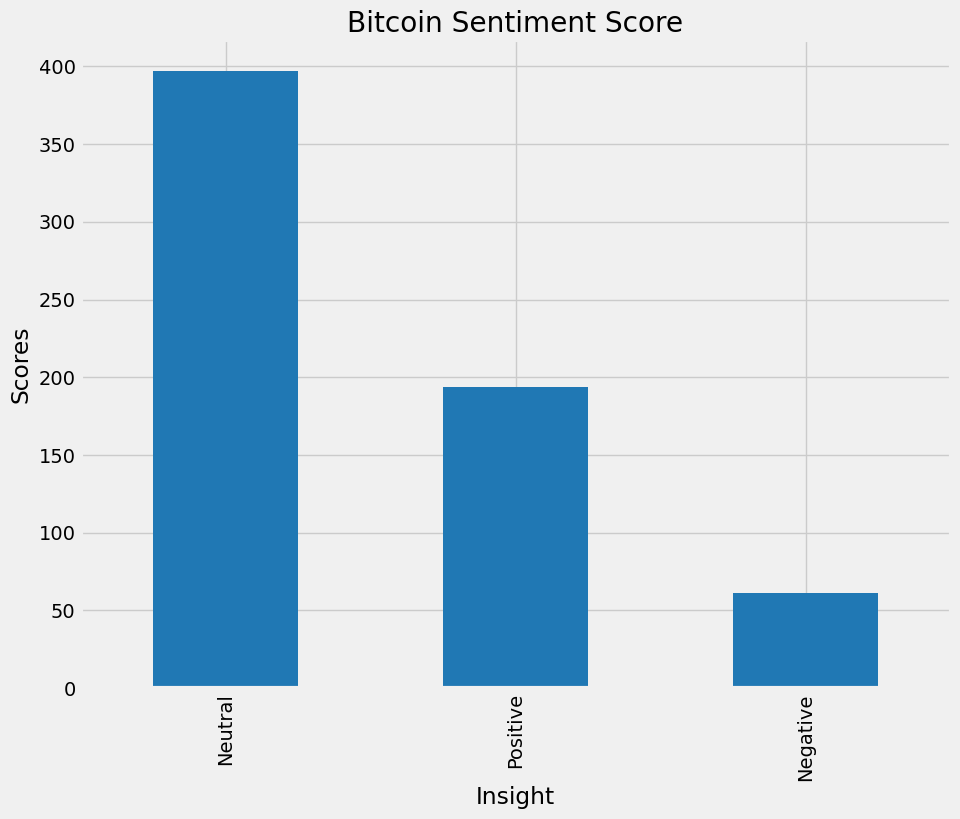

In [77]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Wordcloud

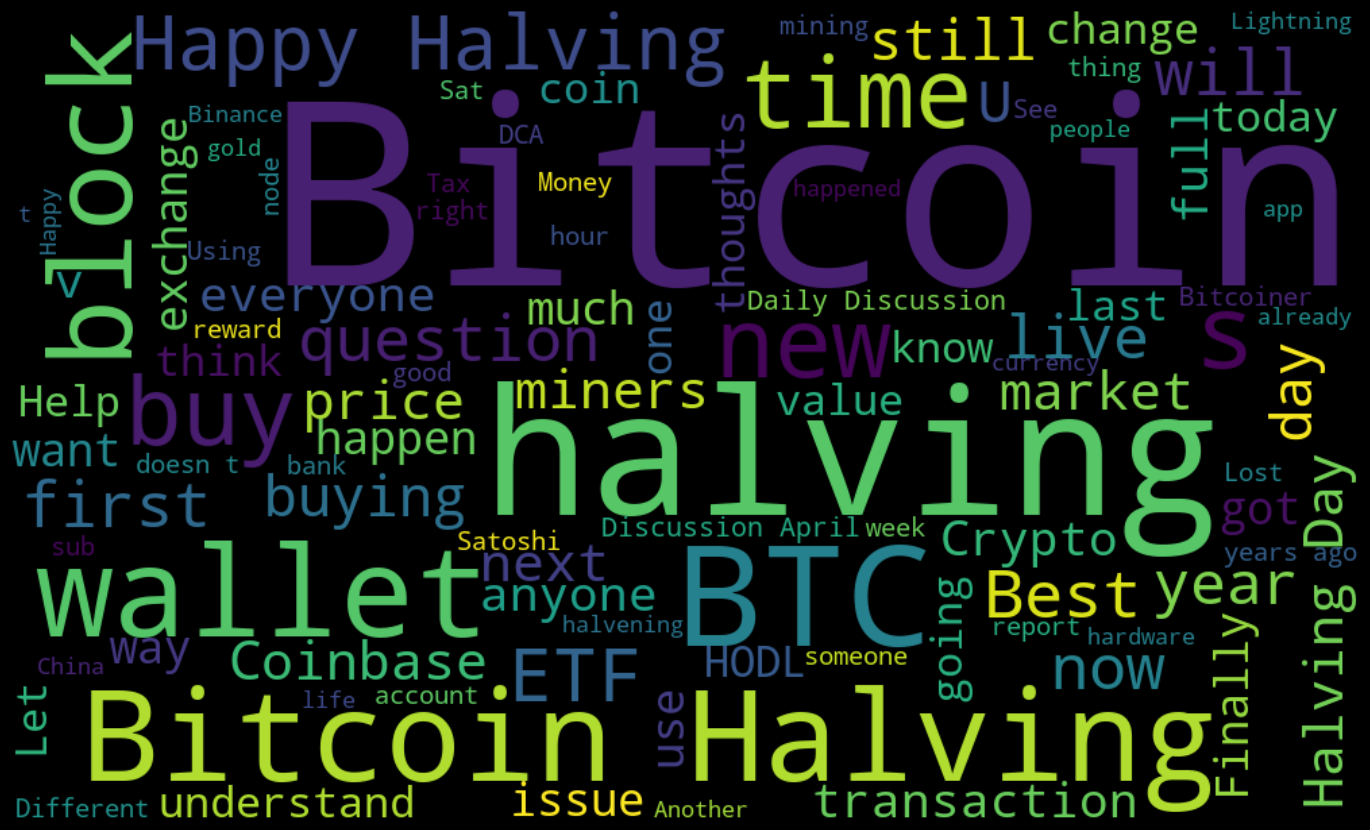

In [78]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");